# Telco Churn Predictive Analysis

## Questions Worth Asking

1. Are subscribers with higher than average monthly bills more likely to churn?

1. Are charges of customers who churn significantly different than those who do not churn?

1. Does tenure correlate with monthly charges? 

1. Is whether or not a customer churns independent of their subscription plan?



# Imports

In [1]:
# import from import.py
from imports import *
# import from prepare.py
import prepare as prep
# import from model.py
import model as model

%matplotlib inline

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

# Data Prep

Much important. Very work. Data tidy.

In [2]:
tidy_data=prep.prep_telco()
train=tidy_data[0]
target_actual=tidy_data[1]

prepping telco
Using cached csv


In [3]:
train.head()

,senior_citizen,tenure,monthly_charges,total_charges,male,partner,dependents,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,fios,contract_one_year,contract_two_year,pay_auto_cc,pay_e_check,pay_mail
0,1,38,95.00,3591.25,0,1,0,1,1,1,1,0,0,0,1,0,1,1,0,1,0,0
1,1,2,70.35,139.05,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0
2,1,11,19.95,214.75,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,10,86.05,834.10,1,0,0,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0
4,0,43,60.00,2548.55,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,1,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4225 entries, 0 to 4224
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   senior_citizen     4225 non-null   int64  
 1   tenure             4225 non-null   int64  
 2   monthly_charges    4225 non-null   float64
 3   total_charges      4225 non-null   float64
 4   male               4225 non-null   uint8  
 5   partner            4225 non-null   uint8  
 6   dependents         4225 non-null   uint8  
 7   phone_service      4225 non-null   uint8  
 8   multiple_lines     4225 non-null   uint8  
 9   online_security    4225 non-null   uint8  
 10  online_backup      4225 non-null   uint8  
 11  device_protection  4225 non-null   uint8  
 12  tech_support       4225 non-null   uint8  
 13  streaming_tv       4225 non-null   uint8  
 14  streaming_movies   4225 non-null   uint8  
 15  paperless_billing  4225 non-null   uint8  
 16  fios               4225 

In [5]:
train.describe()

,senior_citizen,tenure,monthly_charges,total_charges,male,partner,dependents,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,fios,contract_one_year,contract_two_year,pay_auto_cc,pay_e_check,pay_mail
count,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.00000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000
mean,0.164260,32.650178,65.138947,2305.922568,0.500828,0.488757,0.299172,0.906746,0.428639,0.28213,0.349822,0.351716,0.286627,0.386746,0.391006,0.593373,0.449231,0.208047,0.239290,0.217988,0.339408,0.221302
std,0.370556,24.647481,30.336884,2282.371032,0.500058,0.499933,0.457949,0.290823,0.494940,0.45009,0.476970,0.477562,0.452239,0.487062,0.488033,0.491262,0.497475,0.405959,0.426701,0.412928,0.473565,0.415172
min,0.000000,0.000000,18.250000,18.850000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.400000,408.250000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.550000,1389.350000,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,56.000000,90.400000,3886.450000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,118.750000,8672.450000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
target_actual.head()

,churn
0,0
1,1
2,1
3,1
4,0


In [7]:
target_actual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4225 entries, 0 to 4224
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   churn   4225 non-null   uint8
dtypes: uint8(1)
memory usage: 4.3 KB


In [8]:
target_actual.describe()

,churn
count,4225.000000
mean,0.265325
std,0.441559
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


# 1

## Are subscribers with higher than average monthly bills more likely to churn?

In [9]:
average_monthly_cost=train.monthly_charges.mean()
average_monthly_cost

65.1389467455622

### Let's See

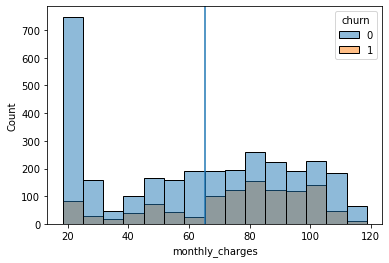

In [10]:
full_train=pd.concat([train,target_actual], axis=1)
sns.histplot(x=full_train.monthly_charges, hue=full_train.churn).axvline(average_monthly_cost)
plt.show()

It looks like most of our churners are paying more than the average.

### Statistically Speaking

$ H_0 = \textrm{"Churned subcribers pay the average amount monthly." }$

$ H_1 = \textrm{"Churned subcribers pay MORE than the average amount monthly." }$

Set our alpha to 0.05

In [11]:
α=0.05

Run a one sample t-test to see if churned subscribers where paying the average amount.

In [12]:
t, p = stats.ttest_1samp(full_train[full_train.churn==1].monthly_charges,average_monthly_cost)
t, p

(12.630413381380443, 2.760565441025366e-34)

In [13]:
if p > α:
    print("Most likely H_0 / failed to reject H_0")
elif t < 0:
     print("Most likely H_0")
else:
    print("Most likely H_1 / reject H_0")

Most likely H_1 / reject H_0


Interpreting this result might indicate that there is a significant difference between the average amount for the total monthly bill and that his difference is greater than.

# 2

## Are charges of customers who churn significantly different than those who do not churn?

### Let's See

In [14]:
churned=full_train[full_train.churn==1]
current=full_train[full_train.churn==0]

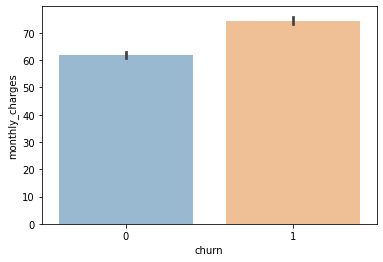

In [15]:
sns.barplot(y = 'monthly_charges',x='churn', data=full_train, alpha=0.5)
plt.show()

It looks like most of our churners are paying more than our current subscribers.

### Statistically Speaking

$ H_0 = \textrm{"Churned \& current subcribers pay = amount's monthly." }$

$ H_1 = \textrm{"Churned subcribers pay MORE than current subscribers." }$

Set our alpha to 0.05

In [16]:
α=0.05

In [17]:
churned.monthly_charges.var()

615.7661004444371

In [18]:
current.monthly_charges.var()

987.4616899342467

Run an independent t-test to see if churned and current subscribers are paying the same monthly amount.

In [19]:
t, p = stats.ttest_ind(churned.monthly_charges, current.monthly_charges, equal_var=False)
t, p

(13.680795933518539, 3.90200280676979e-41)

In [20]:
if p/2 > α:
    print("Most likely H_0 / failed to reject H_0")
elif t < 0:
    print("Most likely H_0")
else:
    print("Most likely H_1 / reject H_0")

Most likely H_1 / reject H_0


Interpreting this result might indicate that churned subscribers pay significantly more than current subscribers monthly amount.

# 3

## Does tenure correlate with monthly charges? 

### Let's See

In [21]:
full_train.head()

,senior_citizen,tenure,monthly_charges,total_charges,male,partner,dependents,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,fios,contract_one_year,contract_two_year,pay_auto_cc,pay_e_check,pay_mail,churn
0,1,38,95.00,3591.25,0,1,0,1,1,1,1,0,0,0,1,0,1,1,0,1,0,0,0
1,1,2,70.35,139.05,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1
2,1,11,19.95,214.75,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,0,10,86.05,834.10,1,0,0,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1
4,0,43,60.00,2548.55,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0


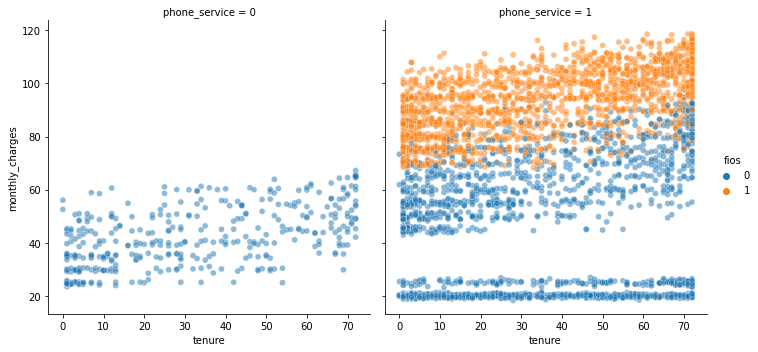

In [22]:
full_train=pd.concat([train,target_actual], axis=1)
sns.relplot(y = 'monthly_charges',x='tenure',hue='fios',col='phone_service', data=full_train, alpha=0.5)
plt.show()

It looks tenure and monthly charges are postively correlated.

### Statistically Speaking

$ H_0 = \textrm{"Subscribers tenure is NOT correlated to there monthly amount" }$

$ H_1 = \textrm{"Subscribers tenure is correlated to there monthly amount." }$

Set our alpha to 0.05

In [23]:
α=0.05

Run an independent t-test to see if churned and current subscribers are paying the same monthly amount.

In [24]:
r, p = stats.pearsonr(full_train.tenure, full_train.monthly_charges)
r, p

(0.23954758922224278, 3.287847282752033e-56)

Interpreting this result might indicate that tenure and monthly charges are correlated but it is not a very strong correlation, meaning a change in one doesn't sway the other to heavily. Addionally, there is no scale of the relationship and so we cannot say if the correlation is negative or positve.

In [25]:
if r<=0.2:
	print("no correlation")
elif r<=0.5:
	print("weak correlation")
elif r<=0.75:
	print("moderate correlation")
else:
	print("strong correlation")

weak correlation


# 4

## Is whether or not a customer churns independent of their subscription plan?

### Let's See

In [26]:
churn_fios=churned[churned.fios==1].fios.count()
churn_nwww=churned[churned.fios==0].fios.count()
current_fios=current[current.fios==1].fios.count()
current_nwww=current[current.fios==0].fios.count()
churn_www=[[churn_fios,churn_nwww],[current_fios,current_nwww]]
crosstab=pd.DataFrame(churn_www,index=['Churned','Not Churned'], columns=['Internet', 'No Internet'])

In [27]:
crosstab

,Internet,No Internet
Churned,782,339
Not Churned,1116,1988


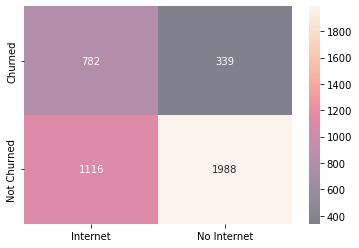

In [28]:
sns.heatmap(data=crosstab, alpha=0.5, annot=True, fmt='0')
plt.show()

It looks our internet subscribers are less like to churn.

### Statistically Speaking

$ H_0 = \textrm{"Internet subscribtion and churn are independent of one another" }$

$ H_1 = \textrm{"Internet subscribtion and churn are NOT independent of one another" }$

Set our alpha to 0.05

In [29]:
α=0.05

Run an independent t-test to see if churned and current subscribers are paying the same monthly amount.

In [30]:
chi2, p, degf, expected = stats.chi2_contingency(crosstab)

In [31]:
print(f'''
chi square value:
{chi2}

p-value:
{p}

degrees of freedom:
{degf}

matrix of expected values:
{expected}

''')


chi square value:
379.0319189770097

p-value:
2.0217543793982373e-84

degrees of freedom:
1

matrix of expected values:
[[ 503.58769231  617.41230769]
 [1394.41230769 1709.58769231]]




Interpreting this result might indicate that internet subscription and churn are dependent on eachother.

In [32]:
if p > α:
    print("Most likely H_0 / failed to reject H_0")
# elif t < 0:
#     print("Most likely H_0")
else:
    print("Most likely H_1 / reject H_0")

Most likely H_1 / reject H_0


# Training a predictive model:

Using various models. Best one used on test.

What is your baseline prediction?

- $H_0: "\textrm{Does NOT churn (0).}"$  
- $H_1: "\textrm{Churning (1).}"$
---
- $TP: "\textrm{Happy customer.}"$  
- $TN: "\textrm{No customer.}"$
- $FN: "\textrm{Random customer walking around the store trying to get a price check.}"$
- $FP: "\textrm{👻}"$


Establish a baseline:

In [33]:
X_train=tidy_data[0]
y_train=tidy_data[1]
baseline=[0 for i in range(0,len(train))]

Test baseline accuracy:

In [34]:
accuracy_score(y_train,baseline)

0.7346745562130178

# Decision Tree

Use our decision tree function:

_________________________

Accuracy of Decision Tree classifier on training set: 78.37%



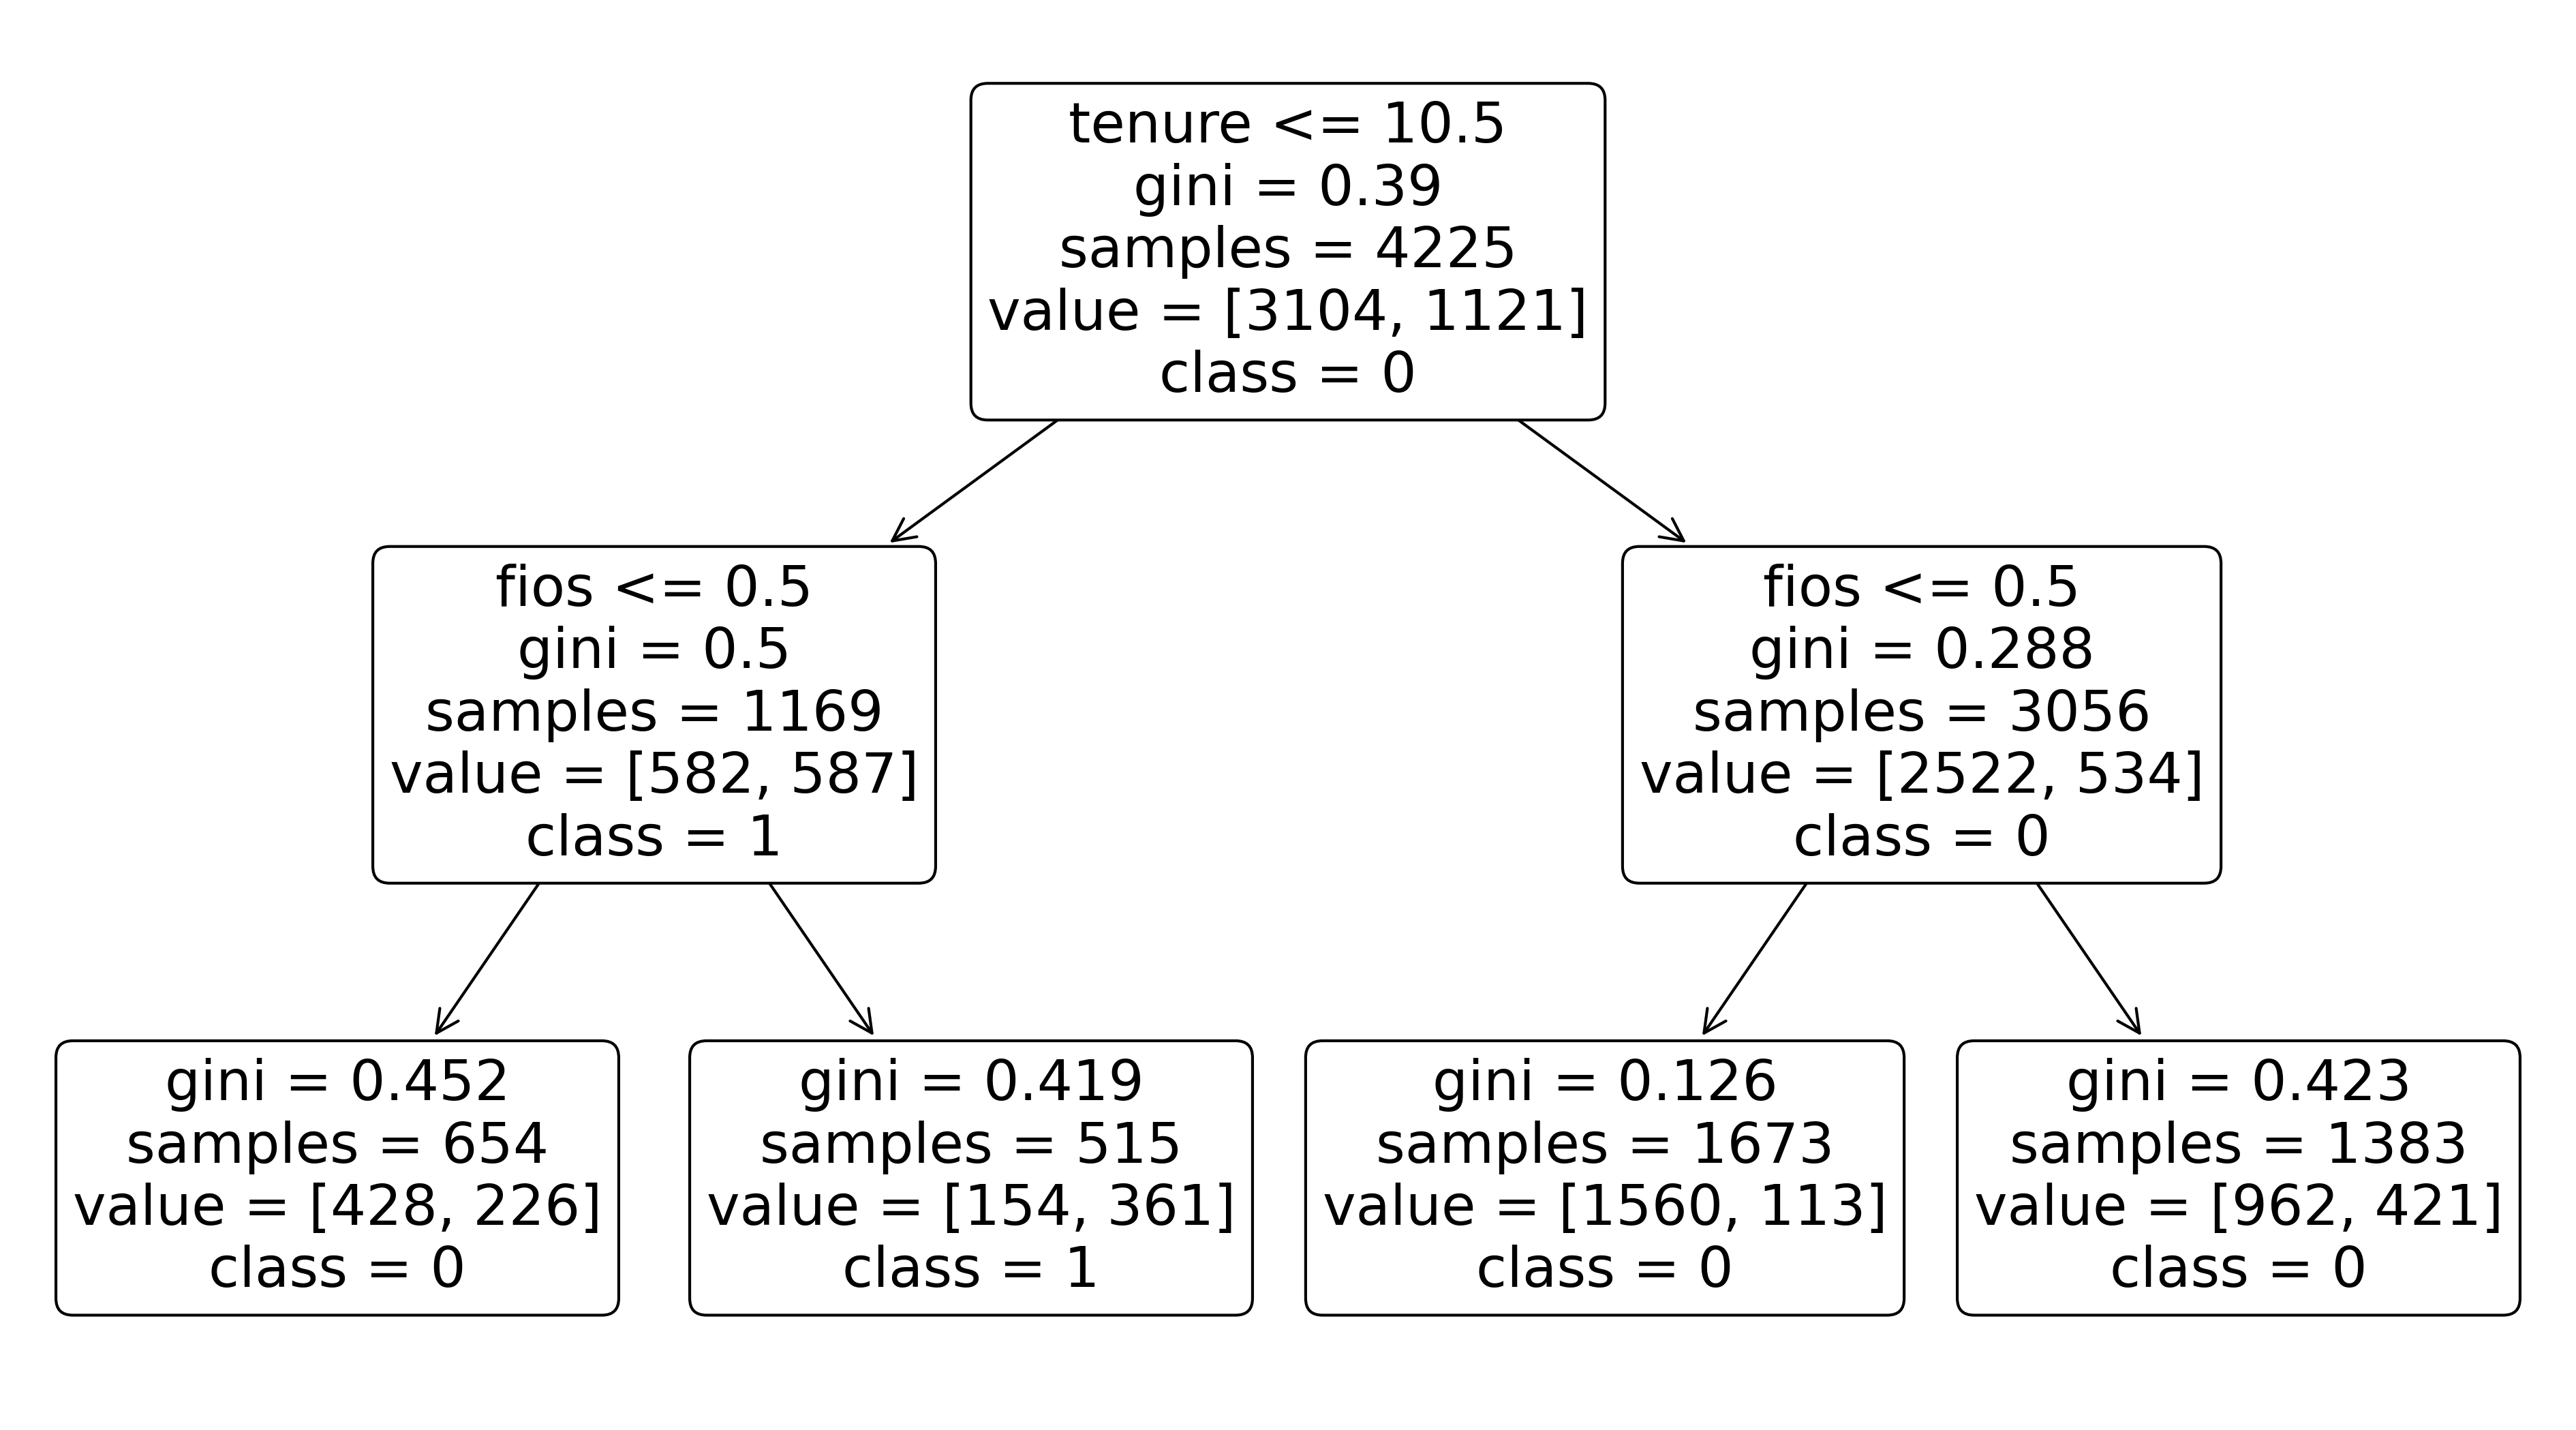

_________________________

Confusion Matrix

      0    1
0  2950  154
1   760  361 

_________________________

Classification Report

                     0            1  accuracy    macro avg  weighted avg
precision     0.795148     0.700971  0.783669     0.748060      0.770161
recall        0.950387     0.322034  0.783669     0.636210      0.783669
f1-score      0.865864     0.441320  0.783669     0.653592      0.753222
support    3104.000000  1121.000000  0.783669  4225.000000   4225.000000


In [35]:
tree_trunk=model.decision_tree_predict(X_train, y_train,max_depth=2)

Decision tree: 78% accuracy, 86% f1-score for predicting churn.

# Random Forest

In [36]:
rf = RandomForestClassifier(min_samples_leaf=1,
                            max_depth=10, 
                            random_state=123)

In [37]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [38]:
y_pred=rf.predict(X_train)
y_pred[:5]

array([0, 1, 0, 1, 0], dtype=uint8)

In [39]:
y_pred_proba = rf.predict_proba(X_train)
y_pred_proba[:5]


array([[0.84596378, 0.15403622],
       [0.25606752, 0.74393248],
       [0.60919264, 0.39080736],
       [0.31987426, 0.68012574],
       [0.93673777, 0.06326223]])

In [40]:
print(rf.feature_importances_)

[0.01791004 0.18088511 0.14782834 0.16797099 0.01903841 0.01831231
 0.0171794  0.01056272 0.01393022 0.03344059 0.01790102 0.01407444
 0.02284549 0.01410715 0.01666705 0.02746587 0.07563388 0.04170421
 0.0624906  0.01144267 0.0556664  0.01294308]


In [41]:
print('Accuracy of Random Forest classifier on training set: {:.2%}\n'
      .format(rf.score(X_train,y_train)))

Accuracy of Random Forest classifier on training set: 88.71%



In [42]:
pd.DataFrame(classification_report(y_train,y_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.894563,0.859375,0.887101,0.876969,0.885227
recall,0.959407,0.686887,0.887101,0.823147,0.887101
f1-score,0.925851,0.763510,0.887101,0.844681,0.882778
support,3104.000000,1121.000000,0.887101,4225.000000,4225.000000


In [43]:
conf=pd.DataFrame(confusion_matrix(y_train, y_pred))
conf_strs=conf.astype(str)
top=pd.DataFrame([['TP: ','FN: '],['FP: ','TN:']])
top+conf_strs

,0,1
0,TP: 2978,FN: 126
1,FP: 351,TN:770


In [44]:
tpr = conf[0][0] / conf[0].sum()
fpr = conf[1][0] / conf[1].sum()
tnr = conf[1][1] / conf[1].sum()
fnr = conf[0][1] / conf[0].sum()
print(f'''
True Positive Rate:
{tpr:.2%}

False Negative Rate:
{fnr:.2%}

False Positive Rate:
{fpr:.2%}

True Negative Rate:
{tnr:.2%}

''')


True Positive Rate:
89.46%

False Negative Rate:
10.54%

False Positive Rate:
14.06%

True Negative Rate:
85.94%




Random Forest: 89% accuracy, 93% f1-score for predicting churn.

# K - Nearest Neighbor's (KNN)

In [45]:
knn = KNeighborsClassifier(5)

In [46]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [47]:
y_pred=knn.predict(X_train)
y_pred[:5]

array([0, 1, 0, 1, 0], dtype=uint8)

In [48]:
y_pred_proba = knn.predict_proba(X_train)
y_pred_proba[:5]


array([[0.8, 0.2],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.2, 0.8],
       [0.8, 0.2]])

In [49]:
print('Accuracy of Random Forest classifier on training set: {:.2%}\n'
      .format(knn.score(X_train, y_train)))

Accuracy of Random Forest classifier on training set: 83.08%



In [50]:
pd.DataFrame(classification_report(y_train,y_pred ,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.855824,0.733871,0.830769,0.794847,0.823467
recall,0.925580,0.568243,0.830769,0.746911,0.830769
f1-score,0.889336,0.640523,0.830769,0.764929,0.823320
support,3104.000000,1121.000000,0.830769,4225.000000,4225.000000


In [51]:
conf=pd.DataFrame(confusion_matrix(y_train,y_pred))
conf_strs=conf.astype(str)
top=pd.DataFrame([['TP: ','FN: '],['FP: ','TN:']])
bot=top+conf_strs
bot


,0,1
0,TP: 2873,FN: 231
1,FP: 484,TN:637


In [52]:
tpr = conf[0][0] / conf[0].sum()
fpr = conf[1][0] / conf[1].sum()
tnr = conf[1][1] / conf[1].sum()
fnr = conf[0][1] / conf[0].sum()
print(f'''
True Positive Rate:
{tpr:.2%}

False Negative Rate:
{fnr:.2%}

False Positive Rate:
{fpr:.2%}

True Negative Rate:
{tnr:.2%}

''')


True Positive Rate:
85.58%

False Negative Rate:
14.42%

False Positive Rate:
26.61%

True Negative Rate:
73.39%




KNN: 83% accuracy, 89% f1-score for predicting churn.

# Logistic Regression

In [53]:
logit = LogisticRegression(random_state=123, solver='lbfgs')

In [54]:
logit.fit(X_train, y_train)

LogisticRegression(random_state=123)

In [55]:
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[ 3.13156799e-01 -6.29979273e-02  1.31547686e-02  3.01138541e-04
   1.67550079e-01 -9.79109137e-03 -1.72089855e-01 -7.30499007e-01
   1.34866347e-01 -6.22508498e-01 -1.97567295e-01  1.40904057e-02
  -5.32857665e-01 -1.70264895e-02  7.69956355e-02  4.09118901e-01
   5.24769926e-01 -5.03643233e-01 -6.12291769e-01 -1.91882352e-01
   2.52975472e-01 -3.02700163e-01]]
Intercept: 
 [-0.43984684]


In [56]:
y_pred = logit.predict(X_train)

In [57]:
y_pred_proba = logit.predict_proba(X_train)

In [58]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'.format(logit.score(X_train,y_train )))

Accuracy of Logistic Regression classifier on training set: 0.80


In [59]:
pd.DataFrame(classification_report(y_pred,y_train,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.901418,0.523640,0.801183,0.712529,0.821570
recall,0.839736,0.657335,0.801183,0.748535,0.801183
f1-score,0.869484,0.582920,0.801183,0.726202,0.808916
support,3332.000000,893.000000,0.801183,4225.000000,4225.000000


In [60]:
conf=pd.DataFrame(confusion_matrix(y_train, y_pred),index=['Actual Churn','Actual Not'], columns=['Predict Churn', 'Predict Not'])
conf


,Predict Churn,Predict Not
Actual Churn,2798,306
Actual Not,534,587


In [61]:
conf=conf.values
tpr = conf[0][0] / conf[0].sum()
fpr = conf[1][0] / conf[1].sum()
tnr = conf[1][1] / conf[1].sum()
fnr = conf[0][1] / conf[0].sum()
print(f'''
True Positive Rate:
{tpr:.2%}

False Negative Rate:
{fnr:.2%}

False Positive Rate:
{fpr:.2%}

True Negative Rate:
{tnr:.2%}

''')


True Positive Rate:
90.14%

False Negative Rate:
9.86%

False Positive Rate:
47.64%

True Negative Rate:
52.36%




Logistic Regression: 80% accuracy, 87% f1-score for predicting churn.

# Validate

In [62]:
X_val=tidy_data[2]
y_val=tidy_data[3]
clf=tree_trunk[0]

In [63]:
y_pred_clf=clf.predict(X_val)
y_pred_rf=rf.predict(X_val)
y_pred_knn=knn.predict(X_val)
y_pred_log=logit.predict(X_val)


In [64]:
_=[print(f"{i}:\n {pd.DataFrame(classification_report(y_val,eval(i),output_dict=True,target_names=['No Churn','Churn']))}\n") for i in ['y_pred_clf','y_pred_rf','y_pred_knn','y_pred_log']]

y_pred_clf:
               No Churn       Churn  accuracy    macro avg  weighted avg
precision     0.793994    0.741573  0.788199     0.767784      0.780091
recall        0.961116    0.309133  0.788199     0.635125      0.788199
f1-score      0.869598    0.436364  0.788199     0.652981      0.754697
support    1183.000000  427.000000  0.788199  1610.000000   1610.000000

y_pred_rf:
               No Churn       Churn  accuracy    macro avg  weighted avg
precision     0.833333    0.692053  0.806832     0.762693      0.795863
recall        0.921386    0.489461  0.806832     0.705424      0.806832
f1-score      0.875151    0.573388  0.806832     0.724269      0.795118
support    1183.000000  427.000000  0.806832  1610.000000   1610.000000

y_pred_knn:
               No Churn       Churn  accuracy    macro avg  weighted avg
precision     0.814187    0.594249  0.771429     0.704218      0.755855
recall        0.892646    0.435597  0.771429     0.664122      0.771429
f1-score      0.851613  

We can see that that our logistic regression model has the highest accuracy on the validate set. The accuracy is consistent with the training data as well, so we can be confident that our model is not too overfit.
Additionally, the F1-score is highest as well as consistant making logistic regression our top choice to test.

# Test

In [70]:
customer_id=tidy_data[4].customer_id
X_test=tidy_data[4].drop('customer_id',axis=1)
y_test=tidy_data[5]

In [73]:
customer_id

0       3243-ZHOHY
1       5793-YOLJN
2       1265-ZFOSD
3       7037-MTYVW
4       7242-QZLXF
           ...    
1203    1934-SJVJK
1204    5049-GLYVG
1205    9314-QDMDW
1206    5440-FLBQG
1207    8792-AOROI
Name: customer_id, Length: 1208, dtype: object

In [108]:
y_pred=logit.predict(X_test)

In [115]:
y_pred_proba=logit.predict_proba(X_test)

In [110]:
pd.DataFrame(classification_report(y_test,y_pred,output_dict=True,target_names=['No Churn','Churn']))


,No Churn,Churn,accuracy,macro avg,weighted avg
precision,0.838266,0.641221,0.79553,0.739744,0.785906
recall,0.894025,0.523364,0.79553,0.708695,0.795530
f1-score,0.865248,0.576329,0.79553,0.720789,0.788474
support,887.000000,321.000000,0.79553,1208.000000,1208.000000


It appears we have a decent model. 
The accuracy is holding strong at roughly 80% compared to the validate set and accrued a 7% drop over the training set. 
The f1-score is holdin steady as well at around 87%. 

# Predictions

In [161]:
y_pred=pd.DataFrame(y_pred)
y_pred_proba=pd.DataFrame(y_pred_proba)
customer_id=pd.DataFrame(customer_id)
predictions=pd.concat([customer_id,y_pred,y_pred_proba],axis=1, ignore_index=True)
predictions.rename({0:'customer_id',1:'prediction',2:'no_churn_proba',3:'churn_proba'},axis=1,inplace=True)
predictions.to_csv('predictions.csv')